In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report, mean_squared_error, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score,  roc_curve, roc_auc_score, precision_recall_curve, auc

# from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode

from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, GridSearchCV , RandomizedSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree
from scipy.spatial import distance
from warnings import filterwarnings
filterwarnings('ignore')


from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import KFold
from hyperopt import hp, tpe, Trials, fmin,space_eval
import graphviz
from IPython.display import display


import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from hyperopt import hp, tpe, fmin

import statsmodels.formula.api as smf
from sklearn.metrics import make_scorer


In [3]:
df = pd.read_csv('XAU_df.csv', index_col='date')
df.head()

,USTVOL,BEI,JPYRR,GDPNOW,FINCON,OIL,ECOSURP,USTR,SPXPOS,USTPOS,DXYPOS,AAII,R4WXAU,R2WXAU,XAU_4,XAU_8,XAU_16,XAU_32,XAU_64
date,,,,,,,,,,,,,,,,,,,
2011-09-14,-1.572940,-0.055558,-0.651098,1.798196,0.245111,-1.097728,1.856571,0.488889,0.311000,0.834344,0.444165,-1.585113,1,1,0.112847,0.067198,0.489946,0.720728,0.810599
2011-09-21,-0.387444,-0.461233,0.164507,0.004356,0.056102,-1.093142,-0.389744,-1.021998,-1.598593,1.165909,0.233943,0.110896,1,1,0.106056,0.062933,0.033138,0.506831,0.719143
2011-09-28,2.531801,0.568746,0.257632,-0.062650,-0.018103,-0.158808,-0.203011,1.969365,0.435989,-0.680475,-0.234681,-0.592135,0,0,0.000000,0.000000,0.000000,0.000000,0.296881
2011-10-05,0.334144,-0.331461,0.166958,0.266176,-0.147084,0.233917,1.239351,-0.640622,-0.169199,-0.374285,-0.139999,0.852070,0,1,0.494349,0.644892,0.150446,0.109920,0.327824
2011-10-12,-0.414408,1.524823,1.084317,-0.375892,-0.280339,1.392025,-0.053101,1.563207,-0.081087,0.277890,0.087266,0.398273,0,0,1.000000,1.000000,0.345140,0.245215,0.357056


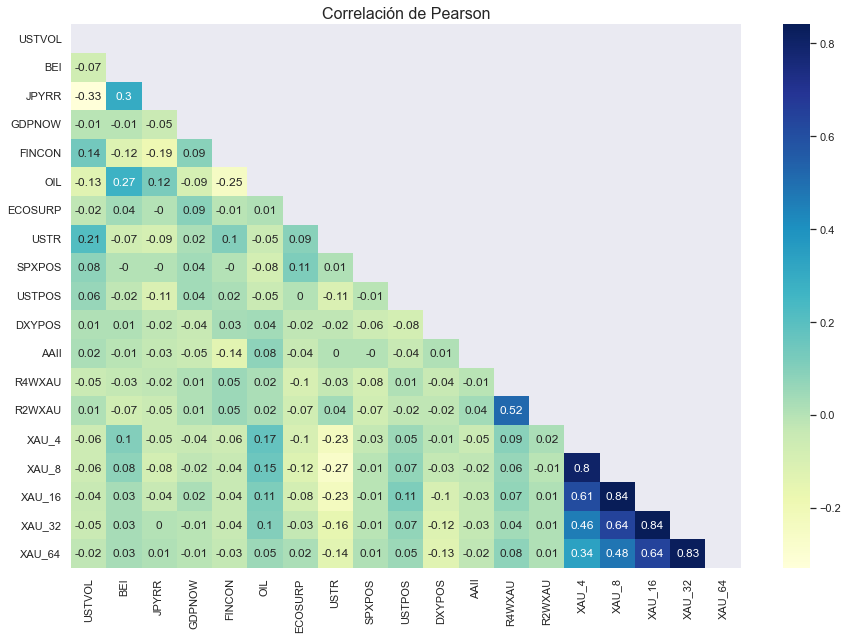

In [4]:
#Correlación de Pearson
plt.figure(figsize = (15,10))
sns.set(font_scale=1)
corr_df = df.corr(method='pearson').round(2)
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_df,annot=True,cmap='YlGnBu',annot_kws={"size":12}, square = False, mask = mask, alpha = 1)
plt.title('Correlación de Pearson', fontsize=16)
plt.show()

1    0.506494
0    0.493506
Name: R4WXAU, dtype: float64


<AxesSubplot:xlabel='R4WXAU', ylabel='count'>

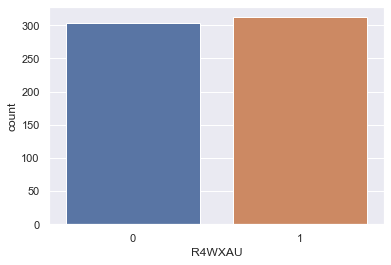

In [5]:
print(df.R4WXAU.value_counts() / df.R4WXAU.value_counts().sum())
sns.countplot( x = 'R4WXAU', data = df)

In [6]:
# Dividir los datos en entrenamiento y testeo
X = df.drop(['R4WXAU', 'R2WXAU'], axis = 1)
y = df.R4WXAU

names = X.columns

Ntest = 100

X_train = X.iloc[:-Ntest]
X_test = X.iloc[-Ntest:]

y_train = y.iloc[:-Ntest]
y_test = y.iloc[-Ntest:]

print(X_train.shape)
print(X_test.shape)


(516, 17)
(100, 17)


# Regresión Logística

Testing accuracy train = 0.6085271317829457
Testing accuracy  test= 0.47
[0.50961538 0.48543689 0.58252427 0.49514563 0.62135922]
Mediana 0.5096
Media 0.5388
Min 0.4854
Max 0.6214
-------------------------------------------------------------------------------------------------------------
Best estimador: {'solver': 'saga', 'penalty': 'l1', 'C': 1.3483483483483483}
Testing accuracy train = 0.5949612403100775
Testing accuracy  test= 0.47


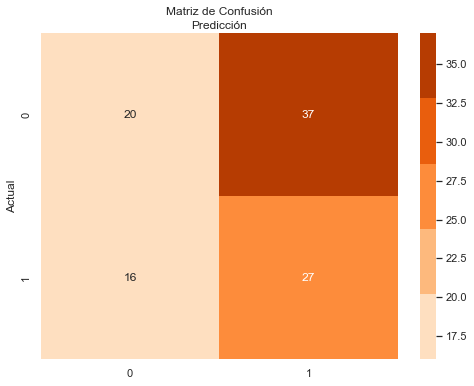

-------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.56      0.35      0.43        57
           1       0.42      0.63      0.50        43

    accuracy                           0.47       100
   macro avg       0.49      0.49      0.47       100
weighted avg       0.50      0.47      0.46       100



In [7]:
random_grid = {'penalty': ["l1","l2", "elasticnet", "none"],
           'C': np.linspace(0,3,1000),
           "solver": ["liblinear", "sag", "saga"]}
cv = StratifiedKFold(n_splits=5,shuffle = False)
Logist = LogisticRegression()
Logist.fit(X_train, y_train)
y_pred = Logist.predict(X_test)
y_train_pred = Logist.predict(X_train)
print("Testing accuracy train =", accuracy_score(y_train, y_train_pred))
print("Testing accuracy  test=", accuracy_score(y_test, y_pred))
scores = cross_val_score(Logist, X_train, y_train, cv=cv, scoring= "accuracy")
print(scores)
print(f'Mediana {np.median(scores).round(4)}')
print(f'Media {np.mean(scores).round(4)}')
print(f'Min {np.min(scores).round(4)}')
print(f'Max {np.max(scores).round(4)}')
print("-------------------------------------------------------------------------------------------------------------")

Logist = RandomizedSearchCV(estimator = LogisticRegression(), param_distributions = random_grid,random_state=42, cv=cv)
Logist.fit(X_train, y_train)
print('Best estimador:', Logist.best_params_)
y_pred = Logist.predict(X_test)
y_train_pred = Logist.predict(X_train)
print("Testing accuracy train =", accuracy_score(y_train, y_train_pred))
print("Testing accuracy  test=", accuracy_score(y_test, y_pred))
cnf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 6))
colors = sns.color_palette("Oranges", n_colors=5)
sns.heatmap(cnf_matrix, annot=True, cmap=colors, fmt='g')
ax.xaxis.set_label_position('top')
ax.set_xlabel('Predicción')
ax.set_ylabel('Actual')
ax.set_title('Matriz de Confusión')
plt.show()
print("-------------------------------------------------------------------------------------------------------------")
print(classification_report(y_test, y_pred > 0.5))

In [8]:
# Obtener los coeficientes y la importancia de las variables
coefficients = np.abs(Logist.best_estimator_.coef_[0])
importance = coefficients / np.sum(coefficients)

impvariables = pd.DataFrame()

impvariables['Variable'] = names

impvariables['Importancia'] = importance
impvariables.sort_values('Importancia', ascending = False)

,Variable,Importancia
16,XAU_64,0.197908
15,XAU_32,0.139677
4,FINCON,0.134834
6,ECOSURP,0.120557
12,XAU_4,0.096641
8,SPXPOS,0.070250
5,OIL,0.056557
0,USTVOL,0.047687
10,DXYPOS,0.045726
1,BEI,0.041111


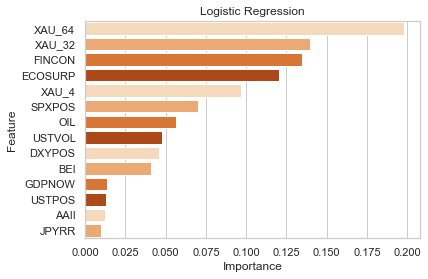

In [9]:
# Establecer estilo con fondo blanco
sns.set_style("whitegrid")

impvariables = impvariables[impvariables.Importancia > 0.01]
impvariables.sort_values('Importancia', ascending = False, inplace = True)

colors = sns.color_palette("Oranges", n_colors=4)

sns.barplot(x='Importancia', y = 'Variable', data = impvariables, palette=colors)
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.title('Logistic Regression');

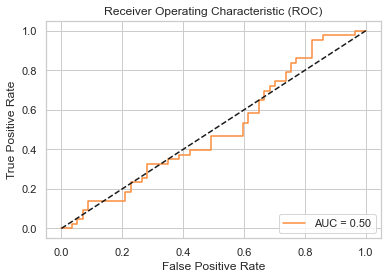

In [10]:
# Obtener las probabilidades predichas en el conjunto de prueba
y_pred_proba = Logist.predict_proba(X_test)[:, 1]

# Calcular el valor de AUC
auc = roc_auc_score(y_test, y_pred_proba)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Crear el gráfico de la curva ROC con colores personalizados
colors = sns.color_palette("Oranges", n_colors=1)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}', color=colors[0])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Random Forest

In [11]:
# Definir la función objetivo para la optimización bayesiana
def objective(params):
    model = RandomForestClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return {'loss': -accuracy, 'status': 'ok', 'params': params}

In [12]:
space = {
    'n_estimators': hp.choice('n_estimators', range(10, 100)),
    'max_depth': hp.choice('max_depth', range(1, 20)),
    'min_samples_split': hp.choice('min_samples_split', range(2, 10)),
    'min_samples_leaf': hp.choice('min_samples_leaf',range(2,10))
}

In [13]:
trials = Trials()  
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=1000, trials=trials)


100%|██████████| 1000/1000 [01:12<00:00, 13.88trial/s, best loss: -0.58]


In [14]:
losses = [trial['result']['loss'] for trial in trials.trials]

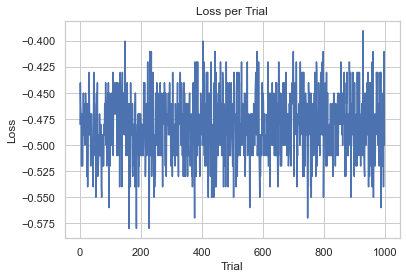

In [15]:
plt.plot(range(len(losses)), losses)
plt.xlabel('Trial')
plt.ylabel('Loss')
plt.title('Loss per Trial')
plt.show()

In [16]:
best_params = space_eval(space, best)
print("Mejores hiperparámetros:", best_params)

Mejores hiperparámetros: {'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 36}


In [17]:
# Crear un modelo Random Forest con los hiperparámetros optimizados
modelo = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                               max_depth=best_params['max_depth'],
                               min_samples_split=best_params['min_samples_split'],
                               min_samples_leaf=best_params['min_samples_leaf'])

In [18]:
# Realizar validación cruzada en el conjunto de entrenamiento
cv_scores = cross_val_score(modelo, X_train, y_train, cv=5)

In [19]:
# Obtener la precisión promedio en la validación cruzada
mean_accuracy = np.mean(cv_scores)
mean_accuracy

0.49049663928304704

In [20]:
# Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, min_samples_leaf=3, min_samples_split=4,
                       n_estimators=36)

In [21]:
# Realizar predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

#Calcular Accuracy
print('Accuracy:', np.mean(y_pred == y_test))

# Calcular la precisión
precision = precision_score(y_test, y_pred)
print("Precisión: {:.4f}".format(precision))

# Calcular el recall
recall = recall_score(y_test, y_pred)
print("Recall: {:.4f}".format(recall))

# Calcular el F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score: {:.4f}".format(f1))

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE): {:.4f}".format(mse))

# Calcular el área bajo la curva ROC (ROC-AUC)
y_pred_prob = modelo.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("Área bajo la curva ROC (ROC-AUC): {:.4f}".format(roc_auc))

Accuracy: 0.48
Precisión: 0.4237
Recall: 0.5814
F1-score: 0.4902
Error cuadrático medio (MSE): 0.5200
Área bajo la curva ROC (ROC-AUC): 0.4859


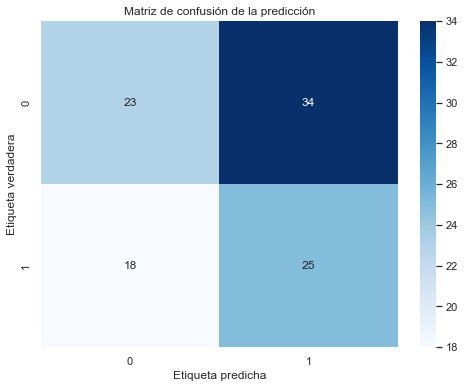

In [22]:
# Crear la matriz de confusión con datos de prueba
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de confusión")
plt.xlabel("Etiqueta predicha")
plt.ylabel("Etiqueta verdadera")
plt.title('Matriz de confusión de la predicción')
plt.show()

## Importancia de las Variables

In [23]:
# Obtener la importancia de las variables
importances = modelo.feature_importances_

# Obtener los nombres de las variables
feature_names = X.columns

# Crear un DataFrame con las importancias y los nombres de las variables
importance_df = pd.DataFrame({'Variable': feature_names, 'Importancia': importances})

# Ordenar las variables por importancia descendente
importance_df = importance_df.sort_values('Importancia', ascending=False)

print(importance_df)


   Variable  Importancia
4    FINCON     0.090601
11     AAII     0.087576
8    SPXPOS     0.071306
3    GDPNOW     0.069979
5       OIL     0.067739
6   ECOSURP     0.065291
2     JPYRR     0.062858
9    USTPOS     0.059073
10   DXYPOS     0.058785
1       BEI     0.056672
16   XAU_64     0.053419
14   XAU_16     0.049701
0    USTVOL     0.048785
15   XAU_32     0.048721
7      USTR     0.042172
12    XAU_4     0.034738
13    XAU_8     0.032585


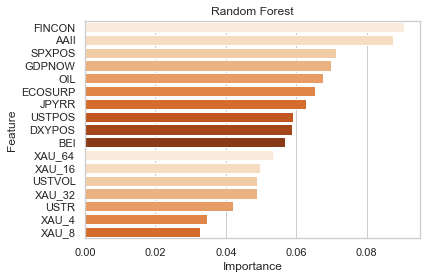

In [24]:
# Establecer estilo con fondo blanco
sns.set_style("whitegrid")

impvariables = importance_df[importance_df.Importancia > 0]

colors = sns.color_palette("Oranges", n_colors=10)

sns.barplot(x='Importancia', y = 'Variable', data = impvariables, palette=colors)
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.title('Random Forest');

## Sesgo y Varianza

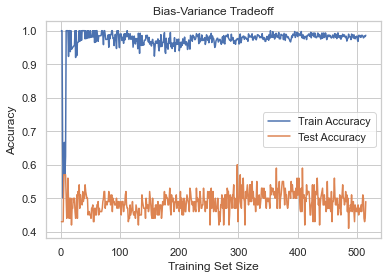

In [25]:
# Inicializar las listas para almacenar las precisiones
train_accuracies = []
test_accuracies = []


# Definir el rango de tamaños de conjunto de entrenamiento
train_sizes = np.arange(1, len(X_train))

# Calcular la precisión para diferentes tamaños de conjunto de entrenamiento
for train_size in train_sizes:
    # Ajustar el modelo Random Forest con los mejores hiperparámetros encontrados
    model = RandomForestClassifier(**best_params)
    model.fit(X_train[:train_size], y_train[:train_size])
    
    # Calcular la precisión del conjunto de entrenamiento y prueba
    train_pred = model.predict(X_train[:train_size])
    train_accuracy = accuracy_score(y_train[:train_size], train_pred)
    test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    
    # Almacenar las precisiones del conjunto de entrenamiento y prueba
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Graficar las precisiones en función del tamaño del conjunto de entrenamiento
plt.plot(train_sizes, train_accuracies, label='Train Accuracy')
plt.plot(train_sizes, test_accuracies, label='Test Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Bias-Variance Tradeoff')
plt.show()

# XG Boost

In [26]:
def metricas(y_test,y_pred):
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cnf = confusion_matrix(y_test, y_pred)
    fig,ax=plt.subplots(figsize=(8,6))
    sns.heatmap(cnf,annot=True,cmap='Blues_r',fmt='g',)
    ax.xaxis.set_label_position('top')
    ax.set_xlabel('Predicción')
    ax.set_ylabel('Actual')
    ax.set_title('Matriz de confusión')

    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print(classification_report(y_test, y_pred > 0.5))
    print("Confusion Matrix:")

def AUC(y_test,y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    # Grafica la curva ROC
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

In [27]:
# Default parameters
Dparams = {
    'booster': 'gbtree', 
    'verbosity': 1, # Verbosity of printing messages. 1 is warning messages.
    'objective': 'binary:logistic', # Classification task
    'subsample': 1, # Subsample ratio of the training instances. Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees. and this will prevent overfitting. 
    'colsample_bytree': 1, # Is the subsample ratio of columns when constructing each tree. Subsampling occurs once for every tree constructed.
    'eta': 0.3, # Step size shrinkage used in update to prevents overfitting. Shrinks the feature weights to make the boosting process more conservative.
    'max_depth': 6, # Increasing this value will make the model more complex and more likely to overfit. 0 indicates no limit on depth.
    'eval_metric': ['logloss','error','auc'],
    'seed': 42} # for reproducible results

In [28]:
# Utilizando la librería XGBoost y los paramétros por default
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)

watchlist = [(dtrain, 'train'), (dtest, 'test')]

xgb_model = xgb.train(Dparams, dtrain, 300, evals = watchlist,
                      early_stopping_rounds = 50, 
                      verbose_eval = 10
                      )

[0]	train-logloss:0.60485	train-error:0.21318	train-auc:0.85913	test-logloss:0.71250	test-error:0.49000	test-auc:0.48327
[10]	train-logloss:0.27589	train-error:0.00775	train-auc:0.99946	test-logloss:0.84532	test-error:0.54000	test-auc:0.46920
[20]	train-logloss:0.16560	train-error:0.00000	train-auc:1.00000	test-logloss:0.85397	test-error:0.47000	test-auc:0.52101
[30]	train-logloss:0.10498	train-error:0.00000	train-auc:1.00000	test-logloss:0.92404	test-error:0.49000	test-auc:0.50347
[40]	train-logloss:0.07304	train-error:0.00000	train-auc:1.00000	test-logloss:0.96183	test-error:0.47000	test-auc:0.50102
[50]	train-logloss:0.05439	train-error:0.00000	train-auc:1.00000	test-logloss:0.98272	test-error:0.47000	test-auc:0.50551
[60]	train-logloss:0.04274	train-error:0.00000	train-auc:1.00000	test-logloss:1.01839	test-error:0.48000	test-auc:0.52387
[70]	train-logloss:0.03451	train-error:0.00000	train-auc:1.00000	test-logloss:1.05634	test-error:0.47000	test-auc:0.51489
[71]	train-logloss:0.0340

In [29]:
y_pred1 = xgb_model.predict(dtest)
y_pred_rounded = np.round(y_pred1)

Precision: 0.4642857142857143
Recall: 0.6046511627906976
F1-score: 0.5252525252525253
              precision    recall  f1-score   support

           0       0.61      0.47      0.53        57
           1       0.46      0.60      0.53        43

    accuracy                           0.53       100
   macro avg       0.54      0.54      0.53       100
weighted avg       0.55      0.53      0.53       100

Confusion Matrix:


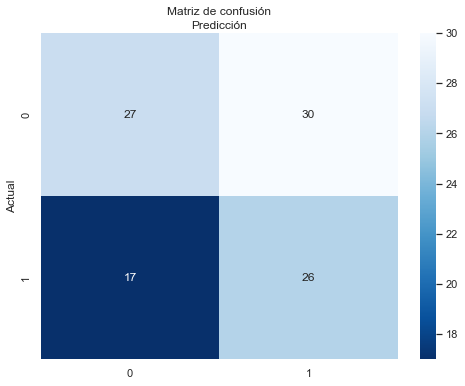

In [30]:
metricas(y_test, y_pred_rounded)

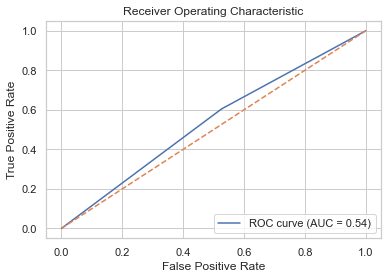

In [31]:
AUC(y_test, y_pred_rounded)

## Optimización de Hiperparámetros

In [32]:
# Definir espacio de búsqueda de hiperparámetros
space = {
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'eta': hp.uniform('eta',0.1, 1),
    'n_estimators': hp.quniform('n_estimators', 10, 1000, 1)
}

In [33]:
# Función objetivo para optimización
def objective(params):
    model = xgb.XGBClassifier(
        booster= 'gbtree',
        objective='binary:logistic',
        max_depth=int(params['max_depth']),
        subsample=params['subsample'],
        colsample_bytree=params['colsample_bytree'],
        eta=params['eta'],
        n_estimators=int(params['n_estimators']),
        random_state=42
    )
    # Entrenar y evaluar el modelo
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return {'loss': -accuracy, 'status': 'ok'}

In [34]:

# Realizar la optimización de parámetros
best_params = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=1000,
    )

  0%|          | 0/1000 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 1000/1000 [05:11<00:00,  3.21trial/s, best loss: -0.62]


In [35]:
best_params

{'colsample_bytree': 0.5832188711458735,
 'eta': 0.8102679521384423,
 'max_depth': 6.0,
 'n_estimators': 606.0,
 'subsample': 0.5773287739736968}

In [36]:
# Entrenar el modelo con los mejores parámetros encontrados
final_model = xgb.XGBClassifier(
    booster='gbtree',
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    eta=best_params['eta'],
    eval_metric=['logloss','error','auc'],
    random_state=42
)
final_model.fit(X_train, y_train, eval_set=[(X_train, y_train), 
                    (X_test, y_test)])

[0]	validation_0-logloss:0.60445	validation_0-error:0.33140	validation_0-auc:0.73352	validation_1-logloss:0.72913	validation_1-error:0.49000	validation_1-auc:0.56793
[1]	validation_0-logloss:0.56771	validation_0-error:0.26744	validation_0-auc:0.77940	validation_1-logloss:0.75039	validation_1-error:0.46000	validation_1-auc:0.58568
[2]	validation_0-logloss:0.51067	validation_0-error:0.23256	validation_0-auc:0.83511	validation_1-logloss:0.77400	validation_1-error:0.41000	validation_1-auc:0.61975
[3]	validation_0-logloss:0.43275	validation_0-error:0.19380	validation_0-auc:0.88647	validation_1-logloss:0.80037	validation_1-error:0.41000	validation_1-auc:0.62770
[4]	validation_0-logloss:0.40015	validation_0-error:0.16279	validation_0-auc:0.90395	validation_1-logloss:0.85732	validation_1-error:0.43000	validation_1-auc:0.60302
[5]	validation_0-logloss:0.34533	validation_0-error:0.13760	validation_0-auc:0.93656	validation_1-logloss:0.94662	validation_1-error:0.46000	validation_1-auc:0.55855
[6]	

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5832188711458735, early_stopping_rounds=None,
              enable_categorical=False, eta=0.8102679521384423,
              eval_metric=['logloss', 'error', 'auc'], feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=606, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

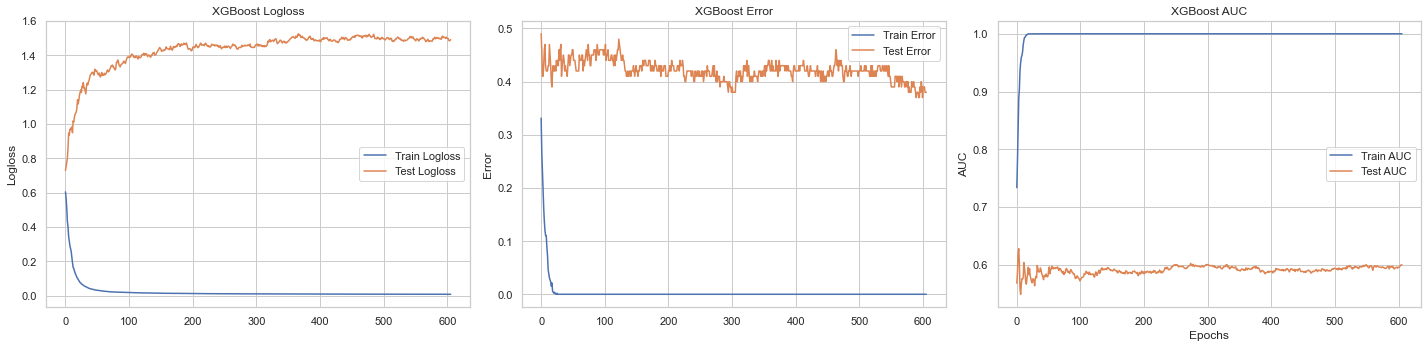

In [37]:
results = final_model.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

# Plot logloss
ax1.plot(x_axis, results['validation_0']['logloss'], label='Train Logloss')
ax1.plot(x_axis, results['validation_1']['logloss'], label='Test Logloss')
ax1.legend()
ax1.set_ylabel('Logloss')
ax1.set_title('XGBoost Logloss')

# Plot Error
ax2.plot(x_axis, results['validation_0']['error'], label='Train Error')
ax2.plot(x_axis, results['validation_1']['error'], label='Test Error')
ax2.legend()
ax2.set_ylabel('Error')
ax2.set_title('XGBoost Error')

# Plot AUC
ax3.plot(x_axis, results['validation_0']['auc'], label='Train AUC')
ax3.plot(x_axis, results['validation_1']['auc'], label='Test AUC')
ax3.legend()
ax3.set_ylabel('AUC')
ax3.set_title('XGBoost AUC')

plt.xlabel('Epochs')

plt.tight_layout()
plt.show()

Precision: 0.5490196078431373
Recall: 0.6511627906976745
F1-score: 0.5957446808510639
              precision    recall  f1-score   support

           0       0.69      0.60      0.64        57
           1       0.55      0.65      0.60        43

    accuracy                           0.62       100
   macro avg       0.62      0.62      0.62       100
weighted avg       0.63      0.62      0.62       100

Confusion Matrix:


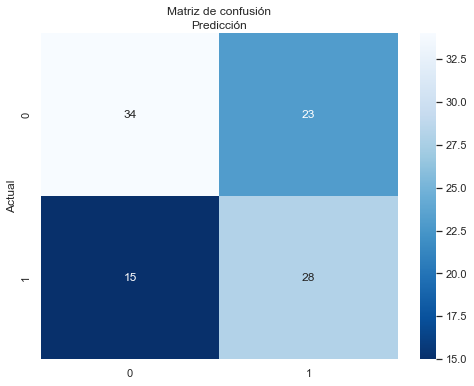

In [38]:
y_pred = final_model.predict(X_test)
y_pred = np.round(y_pred)  # Redondea las predicciones a la clase más cercana (binario)

metricas(y_test,y_pred)

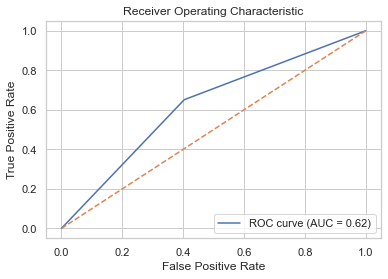

In [39]:
AUC(y_test, y_pred)

## Hiperparámetros con CV

  0%|          | 0/1000 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 1000/1000 [15:00<00:00,  1.11trial/s, best loss: -0.5906976744186047]
[0]	validation_0-logloss:0.61579	validation_0-error:0.33140	validation_0-auc:0.72712	validation_1-logloss:0.71216	validation_1-error:0.48000	validation_1-auc:0.54753
[1]	validation_0-logloss:0.55804	validation_0-error:0.26357	validation_0-auc:0.81422	validation_1-logloss:0.72559	validation_1-error:0.43000	validation_1-auc:0.55386
[2]	validation_0-logloss:0.47426	validation_0-error:0.17442	validation_0-auc:0.89072	validation_1-logloss:0.76750	validation_1-error:0.47000	validation_1-auc:0.53509
[3]	validation_0-logloss:0.41484	validation_0-error:0.14535	validation_0-auc:0.92980	validation_1-logloss:0.82019	validation_1-error:0.42000	validation_1-auc:0.51530
[4]	validation_0-logloss:0.37792	validation_0-error:0.11628	validation_0-auc:0.94786	validation_1-logloss:0.86637	validation_1-error:0.52000	validation_1-auc:0.49551
[5]	validation_0-logloss:0.34222	validation_0-error:0.09884	validation_0-auc:0.9600

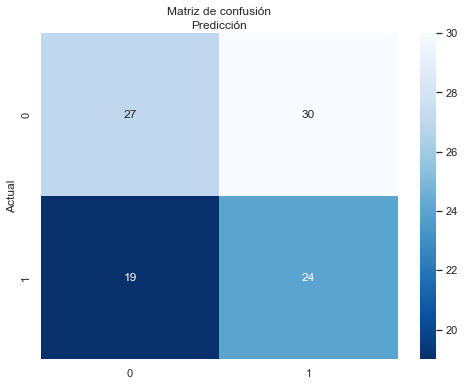

In [40]:

# Definir espacio de búsqueda de hiperparámetros
space = {
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'eta': hp.uniform('eta', 0.1, 1),
    'n_estimators': hp.quniform('n_estimators', 10, 1000, 1)
}

# Función objetivo para optimización
def objective(params):
    model = xgb.XGBClassifier(
        booster='gbtree',
        objective='binary:logistic',
        max_depth=int(params['max_depth']),
        subsample=params['subsample'],
        colsample_bytree=params['colsample_bytree'],
        eta=params['eta'],
        n_estimators=int(params['n_estimators']),
        random_state=42
    )

    # Realizar validación cruzada con TimeSeriesSplit
    tscv = TimeSeriesSplit(n_splits=5)
    cv_scores = cross_val_score(model, X_train, y_train, cv=tscv, scoring=make_scorer(accuracy_score))

    # Calcular la pérdida como el negativo del promedio de la precisión en validación cruzada
    loss = -cv_scores.mean()

    return {'loss': loss, 'status': 'ok'}

# Realizar la optimización de parámetros
best_params = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=1000,
)

# Entrenar el modelo con los mejores parámetros encontrados
final_model = xgb.XGBClassifier(
    booster='gbtree',
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    eta=best_params['eta'],
    eval_metric=['logloss', 'error', 'auc'],
    random_state=42
)
final_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)])

# Evaluar en conjunto de prueba
y_pred = final_model.predict(X_test)
y_pred = np.round(y_pred)  # Redondea las predicciones a la clase más cercana (binario)

# Calcular y mostrar métricas
metricas(y_test, y_pred)


## Optimización de max_depth y n_estimators

In [41]:
# Espacio de búsqueda de hiperparámetros
space2 = {
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
    'n_estimators': hp.quniform('n_estimators', 10, 1000, 1)
}

In [42]:
# Función objetivo para optimización
def objective2(params):
    model = xgb.XGBClassifier(
        booster= 'gbtree',
        objective='binary:logistic',
        max_depth=int(params['max_depth']),
        n_estimators=int(params['n_estimators']),
        colsample_bytree = 0.85,
        eta=0.1,
        subsample=0.8,     
        random_state=42
    )
    # Entrenar y evaluar el modelo
    model.fit(X_train, y_train)
    y_pred3 = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred3)
    return {'loss': -accuracy, 'status': 'ok'}

In [43]:
# Optimización de parámetros
best_params3 = fmin(
    fn=objective2,
    space=space2,
    algo=tpe.suggest,
    max_evals=1000,
    )

100%|██████████| 1000/1000 [04:28<00:00,  3.72trial/s, best loss: -0.58]


In [44]:
best_params3

{'max_depth': 4.0, 'n_estimators': 214.0}

In [45]:
# Entrenar el modelo con los mejores parámetros encontrados
xgb_final_model = xgb.XGBClassifier(
    booster='gbtree',
    n_estimators=int(best_params3['n_estimators']),
    max_depth=int(best_params3['max_depth']),
    subsample=0.8,
    colsample_bytree=0.85,
    eta=0.1,
    eval_metric=['logloss','error','auc'],
    random_state=42
)
xgb_final_model.fit(X_train, y_train, eval_set=[(X_train, y_train), 
                    (X_test, y_test)])

[0]	validation_0-logloss:0.68176	validation_0-error:0.36434	validation_0-auc:0.68459	validation_1-logloss:0.69287	validation_1-error:0.46000	validation_1-auc:0.51387
[1]	validation_0-logloss:0.67231	validation_0-error:0.30426	validation_0-auc:0.73395	validation_1-logloss:0.69616	validation_1-error:0.48000	validation_1-auc:0.50530
[2]	validation_0-logloss:0.65710	validation_0-error:0.28101	validation_0-auc:0.80261	validation_1-logloss:0.69782	validation_1-error:0.54000	validation_1-auc:0.51652
[3]	validation_0-logloss:0.64590	validation_0-error:0.26744	validation_0-auc:0.82081	validation_1-logloss:0.69702	validation_1-error:0.51000	validation_1-auc:0.51081
[4]	validation_0-logloss:0.63768	validation_0-error:0.26163	validation_0-auc:0.82103	validation_1-logloss:0.69725	validation_1-error:0.51000	validation_1-auc:0.51000
[5]	validation_0-logloss:0.62810	validation_0-error:0.23837	validation_0-auc:0.84902	validation_1-logloss:0.70317	validation_1-error:0.52000	validation_1-auc:0.46226
[6]	

[78]	validation_0-logloss:0.27312	validation_0-error:0.00969	validation_0-auc:0.99937	validation_1-logloss:0.80737	validation_1-error:0.46000	validation_1-auc:0.50755
[79]	validation_0-logloss:0.27082	validation_0-error:0.00969	validation_0-auc:0.99938	validation_1-logloss:0.81125	validation_1-error:0.46000	validation_1-auc:0.50632
[80]	validation_0-logloss:0.26778	validation_0-error:0.00969	validation_0-auc:0.99944	validation_1-logloss:0.81233	validation_1-error:0.47000	validation_1-auc:0.50796
[81]	validation_0-logloss:0.26483	validation_0-error:0.01163	validation_0-auc:0.99946	validation_1-logloss:0.81590	validation_1-error:0.46000	validation_1-auc:0.50632
[82]	validation_0-logloss:0.26350	validation_0-error:0.01163	validation_0-auc:0.99947	validation_1-logloss:0.81774	validation_1-error:0.46000	validation_1-auc:0.50836
[83]	validation_0-logloss:0.26121	validation_0-error:0.00581	validation_0-auc:0.99947	validation_1-logloss:0.81761	validation_1-error:0.46000	validation_1-auc:0.5108

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.85, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1,
              eval_metric=['logloss', 'error', 'auc'], feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=214, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

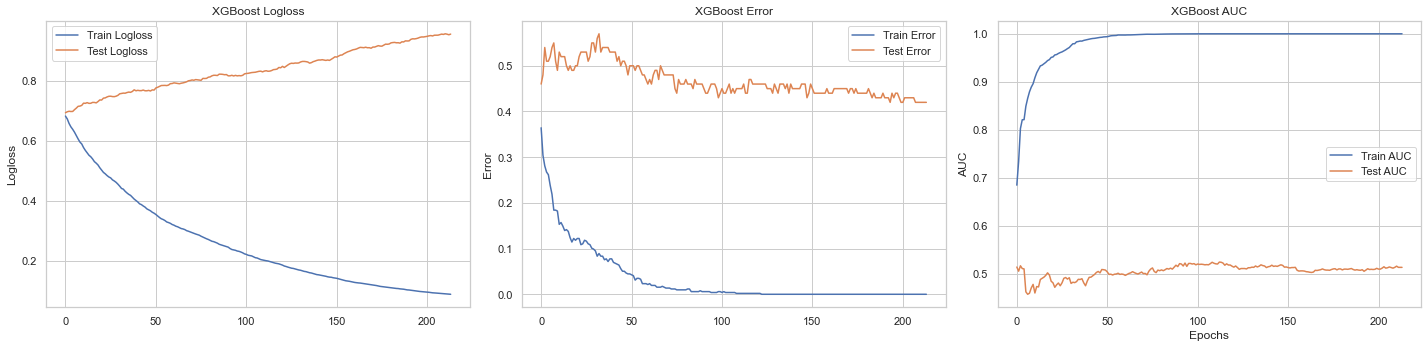

In [46]:
results2 = xgb_final_model.evals_result()
epochs2 = len(results2['validation_0']['logloss'])
x_axis = range(0, epochs2)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

# Plot logloss
ax1.plot(x_axis, results2['validation_0']['logloss'], label='Train Logloss')
ax1.plot(x_axis, results2['validation_1']['logloss'], label='Test Logloss')
ax1.legend()
ax1.set_ylabel('Logloss')
ax1.set_title('XGBoost Logloss')

# Plot Error
ax2.plot(x_axis, results2['validation_0']['error'], label='Train Error')
ax2.plot(x_axis, results2['validation_1']['error'], label='Test Error')
ax2.legend()
ax2.set_ylabel('Error')
ax2.set_title('XGBoost Error')

# Plot AUC
ax3.plot(x_axis, results2['validation_0']['auc'], label='Train AUC')
ax3.plot(x_axis, results2['validation_1']['auc'], label='Test AUC')
ax3.legend()
ax3.set_ylabel('AUC')
ax3.set_title('XGBoost AUC')

plt.xlabel('Epochs')

plt.tight_layout()
plt.show()

Precision: 0.5087719298245614
Recall: 0.6744186046511628
F1-score: 0.58
              precision    recall  f1-score   support

           0       0.67      0.51      0.58        57
           1       0.51      0.67      0.58        43

    accuracy                           0.58       100
   macro avg       0.59      0.59      0.58       100
weighted avg       0.60      0.58      0.58       100

Confusion Matrix:


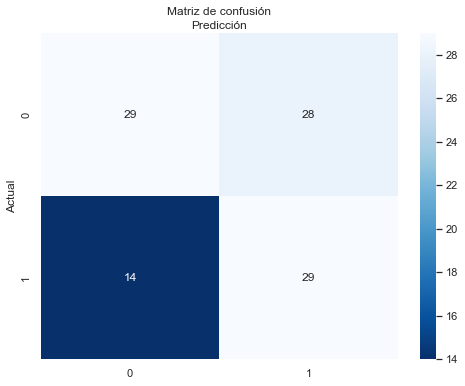

In [47]:
y_pred_n = xgb_final_model.predict(X_test)
y_pred_n = np.round(y_pred_n)  # Redondea las predicciones a la clase más cercana (binario)

# Calcular las métricas
metricas(y_test, y_pred_n)

## Optimización de Hiperparámetros con Cross-Validation

In [48]:
# Definir espacio de búsqueda de hiperparámetros
spaceCV = {
    'max_depth': [int(i) for i in range(1,10)],
    'subsample': [i for i in np.arange(0.1,1,0.1)],
    'colsample_bytree': [i for i in np.arange(0.1,1,1)],
    'eta': [i for i in np.arange(0.01,0.1,0.1)]
}

In [49]:
# Crear un objeto XGBoost Classifier
xgb_model = xgb.XGBClassifier(booster='gbtree', objective='binary:logistic')

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=spaceCV, cv=5, scoring='accuracy')

# Realizar la búsqueda de hiperparámetros y validación cruzada
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros encontrados
best_paramsCV = grid_search.best_params_

# Entrenar el modelo final con los mejores hiperparámetros encontrados
final_modelCV = xgb.XGBClassifier(booster='gbtree', objective='binary:logistic', **best_paramsCV)
final_modelCV.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.1, early_stopping_rounds=None,
              enable_categorical=False, eta=0.01, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=1,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [50]:
best_paramsCV

{'colsample_bytree': 0.1, 'eta': 0.01, 'max_depth': 1, 'subsample': 0.8}

Testing accuracy  test= 0.51
Precision: 0.4625
Recall: 0.8604651162790697
F1-score: 0.6016260162601625
              precision    recall  f1-score   support

           0       0.70      0.25      0.36        57
           1       0.46      0.86      0.60        43

    accuracy                           0.51       100
   macro avg       0.58      0.55      0.48       100
weighted avg       0.60      0.51      0.47       100

Confusion Matrix:


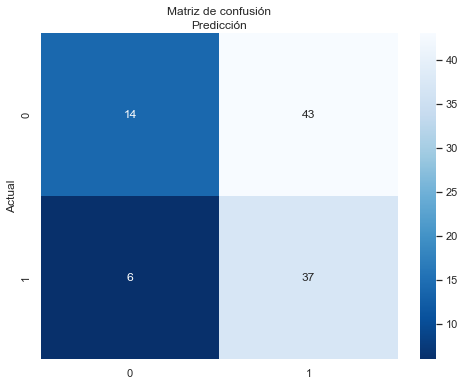

In [51]:
y_predCV = final_modelCV.predict(X_test)
y_predCV = np.round(y_predCV)  # Redondea las predicciones a la clase más cercana (binario)

print("Testing accuracy  test=", accuracy_score(y_test, y_predCV))

metricas(y_test, y_predCV)


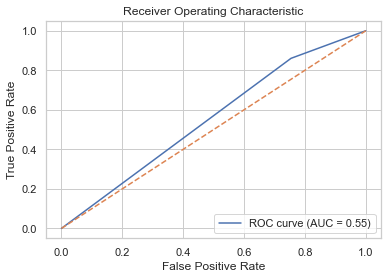

In [52]:
AUC(y_test, y_predCV)

# LSTM

In [53]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [54]:
# Función para crear secuencias
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data)-n_steps+1):
        X.append(data[i:i+n_steps, :-1])
        y.append(data[i+n_steps-1, -1])
    return np.array(X), np.array(y)

np.random.seed(42)

# Escalar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear secuencias para LSTM
n_steps = 3
X_train_seq, y_train_seq = create_sequences(np.hstack((X_train_scaled, y_train.values.reshape(-1,1))), n_steps)
X_test_seq, y_test_seq = create_sequences(np.hstack((X_test_scaled, y_test.values.reshape(-1,1))), n_steps)

# Asegurarse de que las dimensiones sean correctas
y_train_seq = y_train_seq.reshape((y_train_seq.shape[0], 1))
y_test_seq = y_test_seq.reshape((y_test_seq.shape[0], 1))

all_fold_predictions = []

# Dividir los datos en conjuntos de entrenamiento y prueba usando TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X_train_seq):
    X_train_seq_cv, X_test_seq_cv = X_train_seq[train_index], X_train_seq[test_index]
    y_train_seq_cv, y_test_seq_cv = y_train_seq[train_index], y_train_seq[test_index]

    # Crear modelo LSTM con múltiples capas y Dropout
    model = Sequential()
    model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, X_train_seq.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(50, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Entrenar el modelo con más épocas
    model.fit(X_train_seq_cv, y_train_seq_cv, epochs=100, verbose=0)

    # Evaluar en conjunto de prueba
    y_pred_proba_cv = model.predict(X_test_seq_cv)
    y_pred_binary_cv = (y_pred_proba_cv > 0.5).astype(int)
    
       # Guardar las predicciones de este fold
    all_fold_predictions.append((y_test_seq_cv, y_pred_proba_cv))

    # Calcular métricas de clasificación para este fold
    accuracy_cv = accuracy_score(y_test_seq_cv, y_pred_binary_cv)
    precision_cv = precision_score(y_test_seq_cv, y_pred_binary_cv)
    recall_cv = recall_score(y_test_seq_cv, y_pred_binary_cv)
    f1_cv = f1_score(y_test_seq_cv, y_pred_binary_cv)
    roc_auc_cv = roc_auc_score(y_test_seq_cv, y_pred_proba_cv)

    # Imprimir métricas
    print("Accuracy:", accuracy_cv)
    print("Precision:", precision_cv)
    print("Recall:", recall_cv)
    print("F1 Score:", f1_cv)
    print("ROC AUC Score:", roc_auc_cv)
    print("--------------")

# Calcular resultados promedio
avg_accuracy = np.mean([accuracy_score(true, (pred > 0.5).astype(int)) for true, pred in all_fold_predictions])
avg_precision = np.mean([precision_score(true, (pred > 0.5).astype(int)) for true, pred in all_fold_predictions])
avg_recall = np.mean([recall_score(true, (pred > 0.5).astype(int)) for true, pred in all_fold_predictions])
avg_f1 = np.mean([f1_score(true, (pred > 0.5).astype(int)) for true, pred in all_fold_predictions])
avg_roc_auc = np.mean([roc_auc_score(true, pred) for true, pred in all_fold_predictions])

# Imprimir resultados promedio
print("Average Accuracy:", avg_accuracy)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1 Score:", avg_f1)
print("Average ROC AUC Score:", avg_roc_auc)

3/3 [==============================] - 0s 0s/step
Accuracy: 0.6235294117647059
Precision: 0.6862745098039216
Recall: 0.6862745098039216
F1 Score: 0.6862745098039216
ROC AUC Score: 0.6816608996539792
--------------
3/3 [==============================] - 0s 8ms/step
Accuracy: 0.5294117647058824
Precision: 0.5192307692307693
Recall: 0.6428571428571429
F1 Score: 0.574468085106383
ROC AUC Score: 0.5858250276854928
--------------
3/3 [==============================] - 0s 10ms/step
Accuracy: 0.5294117647058824
Precision: 0.5283018867924528
Recall: 0.6511627906976745
F1 Score: 0.5833333333333333
ROC AUC Score: 0.5825027685492803
--------------
3/3 [==============================] - 0s 2ms/step
Accuracy: 0.47058823529411764
Precision: 0.44285714285714284
Recall: 0.8378378378378378
F1 Score: 0.5794392523364486
ROC AUC Score: 0.46846846846846846
--------------
3/3 [==============================] - 0s 0s/step
Accuracy: 0.6588235294117647
Precision: 0.65
Recall: 0.6341463414634146
F1 Score: 0.6419